In [2]:
%% Initialization
clear ; close all; clc

Loading and Visualizing Data ...


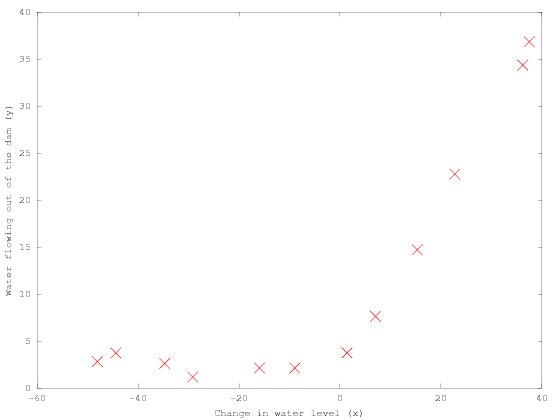

In [4]:
% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1:
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load('./data/ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

In [6]:
%% =========== Part 2: Regularized Linear Regression Cost =============
theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f \n'], J);

Cost at theta = [1 ; 1]: 303.993192 


In [8]:
%% =========== Part 3: Regularized Linear Regression Gradient =============
theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] \n'], grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 


Iteration     2 | Cost: 2.237391e+01


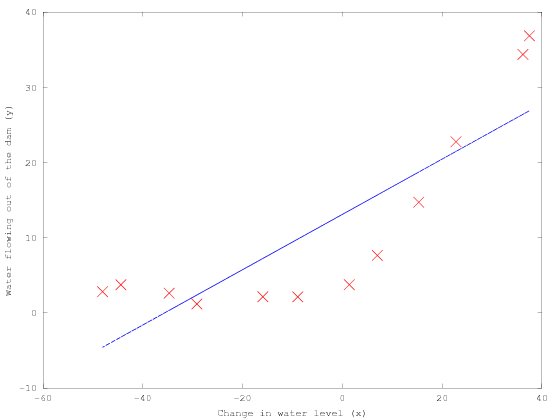

In [9]:
%% =========== Part 4: Train Linear Regression =============
%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 26 column 9

Iteration    24 | Cost: 3.318146e-29
Iteration    27 | Cost: 3.286595e+00
Iteration    10 | Cost: 2.842678e+00
Iteration     3 | Cost: 1.315405e+01
Iteration    15 | Cost: 1.944396e+01
Iteration     7 | Cost: 2.009852e+01
Iteration     4 | Cost: 1.817286e+01
Iteration    15 | Cost: 2.260941e+01
Iteration     9 | Cost: 2.326146e+01
Iteration     8 | Cost: 2.431725e+01
Iteration    18 | Cost: 2.237391e+01
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	204.827168
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


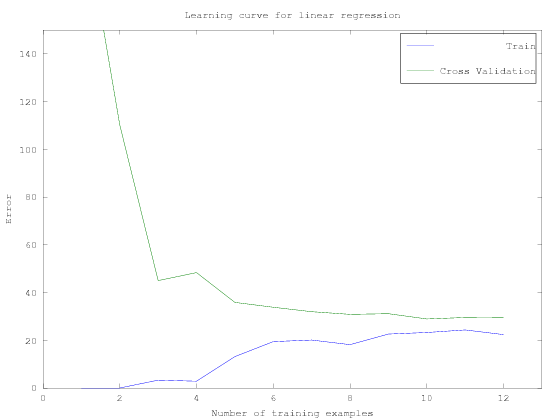

In [10]:
%% =========== Part 5: Learning Curve for Linear Regression =============
lambda = 0;
[error_train, error_val] = learningCurve([ones(m, 1) X], y, [ones(size(Xval, 1), 1) Xval], yval, lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

In [11]:
%% =========== Part 6: Feature Mapping for Polynomial Regression =============

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


Iteration   200 | Cost: 7.639825e-02
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 26 column 9

Iteration     4 | Cost: 4.930381e-32
Iteration    59 | Cost: 3.286920e-32
Iteration    15 | Cost: 4.930381e-32
Iteration   200 | Cost: 1.075011e-16
Iteration   200 | Cost: 1.636540e-04
Iteration   200 | Cost: 5.650883e-03
Iteration   200 | Cost: 6.419987e-02
Iteration   200 | Cost: 1.645427e-01
Iteration   200 | Cost: 7.903974e-02
Iteration   200 | Cost: 1.192985e-01
Iteration   200 | Cost: 1.445730e-01
Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	154.638967
  	2		0.000000	154.844957
  	3		0.000000	31.745533
  	4		0.000000	29.248306
  	5		0.000000	6.498620
  	6		0.000164	10.397876
  	7		0.005651	18.866631
  	8		0.064200	8.285676
  	9		0.164543	7.240916
  	10		0.079040	7.166787
  	11		0.119298	7.672345
  	12		0.144573	21.433330


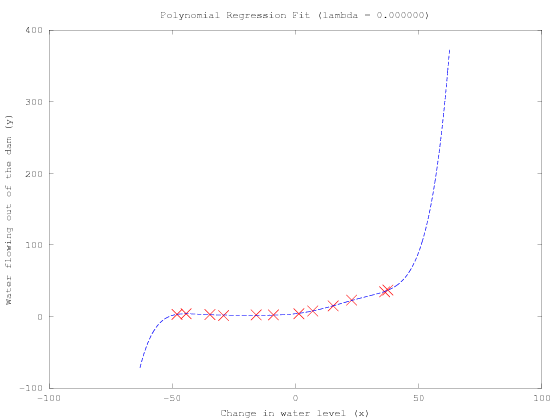

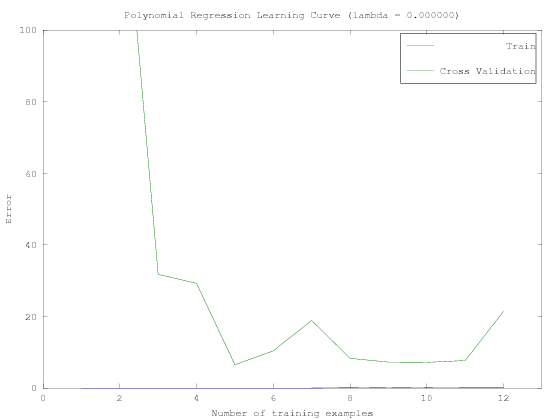

In [12]:
%% =========== Part 7: Learning Curve for Polynomial Regression =============


lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end


Iteration   200 | Cost: 7.639825e-02
Iteration   200 | Cost: 1.946889e-01
Iteration   200 | Cost: 2.522242e-01
Iteration   200 | Cost: 3.850772e-01
Iteration   200 | Cost: 6.692749e-01
Iteration   198 | Cost: 1.443470e+00
Iteration   105 | Cost: 3.101591e+00
Iteration    52 | Cost: 7.268148e+00
Iteration    34 | Cost: 1.586769e+01
Iteration    24 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.076398	9.658082
 0.001000	0.166317	18.416009
 0.003000	0.184755	18.563027
 0.010000	0.222019	17.068897
 0.030000	0.281854	12.829179
 0.100000	0.459318	7.587013
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260625
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


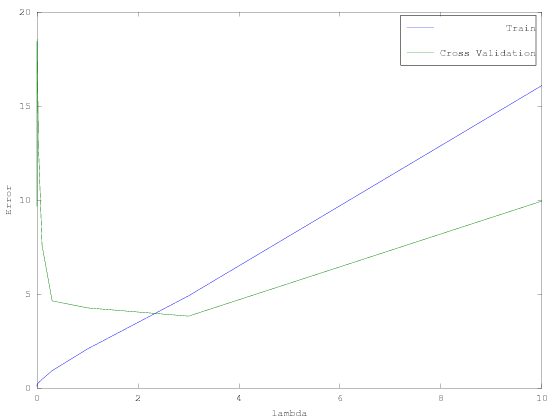

In [13]:
%% =========== Part 8: Validation for Selecting Lambda =============


[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', lambda_vec(i), error_train(i), error_val(i));
end